# Hands-on ML with Python
# Chapter 3 - MNIST Classification

## Setup

In [3]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# Make this notebook's output stable across runs
np.random.seed(42)

# Plotting figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Saving figures 
ROOT_DIR = "."
IMAGES_PATH = os.path.join(ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

In [4]:
# Function to save figures
def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." +  fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Fetching MNIST 
Helper functions to download and import commonly used ML datasets such as MNIST are built into `sklearn`.

In [7]:
# This may take some time
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

Datasets downloaded by `sklearn` have a dictionary structure with key-value pairs for a description of the dataset (`DESCR`), the actual data for the dataset (`data`), and labels/targets for the data (`target`).

In [8]:
# Extracting features and labels
X, y = mnist['data'], mnist['target']

In [9]:
# Examine shape of the features
X.shape

(70000, 784)

In [10]:
# Examine shape of the labels
y.shape

(70000,)

There are 70k arrays of 784 pixel values, which are formed by concatenating the pixel intensity values of a 28px by 28px image end to end.

## Examining a Single Digit

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

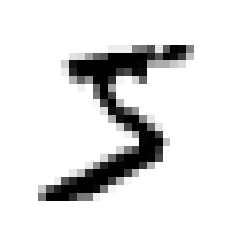

In [12]:
# Features (pixel intensity values) of the first sample in the dataset
some_digit = X[0]

# 1D vector to 2D array of the same size as the original image
some_digit_image = some_digit.reshape(28, 28)

# Render it
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [13]:
# The label for this sample is also 5, although it is a string
y[0]

'5'

In [14]:
# Converting all string labels to int labels for later
y = y.astype(np.uint8)

## Train-Test Split
MNIST dataset is already split: first 60k are training images and last 10k are test images. The training set is already shuffled so all cross-validation folds will be similar.

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

But is the training set also stratified? As in, is there a proportional representation of all classes in the training set?

In [31]:
import pandas as pd 
pd.DataFrame(y_train)[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

Roughly the same, although there is a lot of disparity between 5 and 1. Maybe this is representative of the entire data set?

## Training Binary Classifier
Differentiating between only two classes: digits that are `5` and those that are not. 

In [33]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

Using Stochastic Gradient Descent because it can handle very large datasets, and trains the entire model's weights based on a single randomly drawn sample at a time. 

In [35]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# Must seed the random state so that it draws the same samples across all runs
sgd_clf = SGDClassifier(random_state=42)